<a href="https://colab.research.google.com/github/4rdnac/Machine-Learning_2025/blob/main/TG4_2341720187_CANDRA_AHMAD_DANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

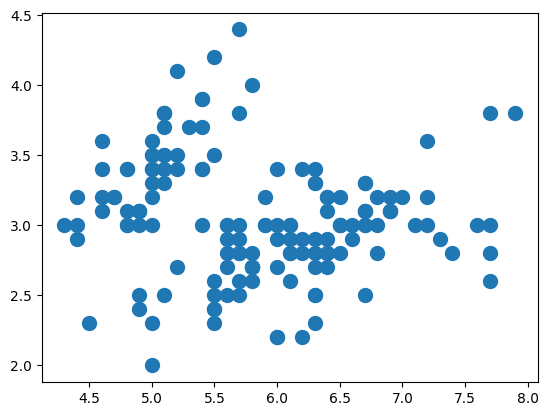

In [5]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [6]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

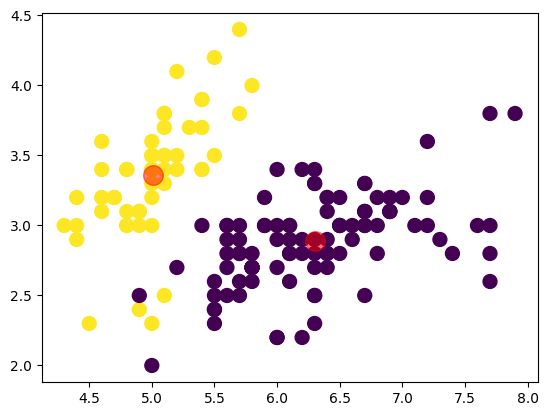

In [7]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [8]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


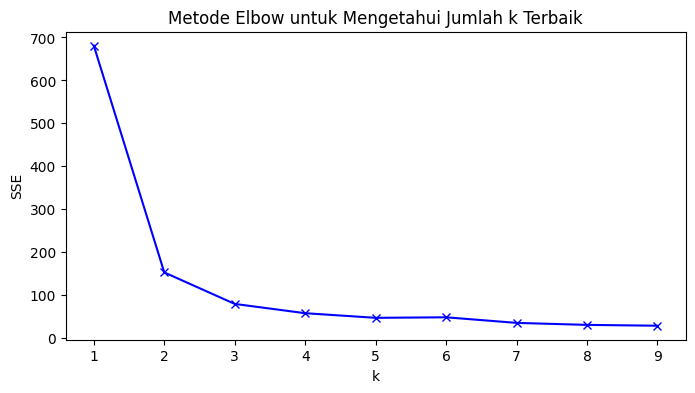

In [9]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [10]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.317873214285726
k=5; SSE=46.535582051282034
k=6; SSE=47.77596825396824
k=7; SSE=34.742815508021366
k=8; SSE=30.085307692307698
k=9; SSE=28.1374413993922


# Praktikum 2

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

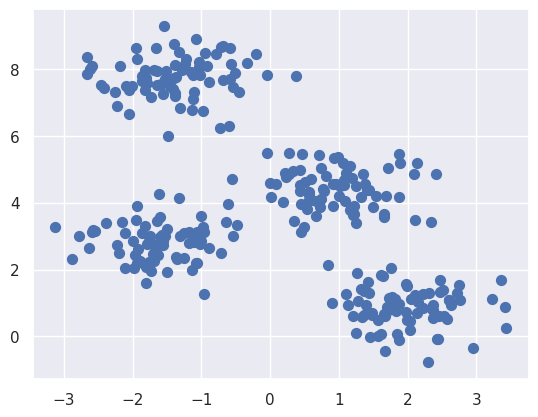

In [12]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

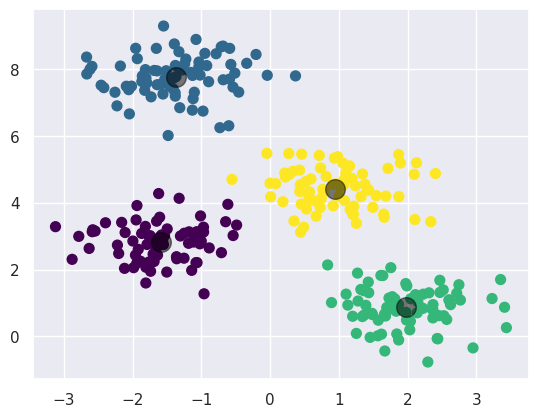

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

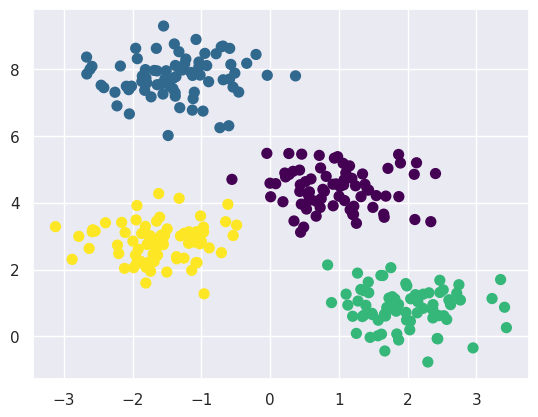

In [15]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

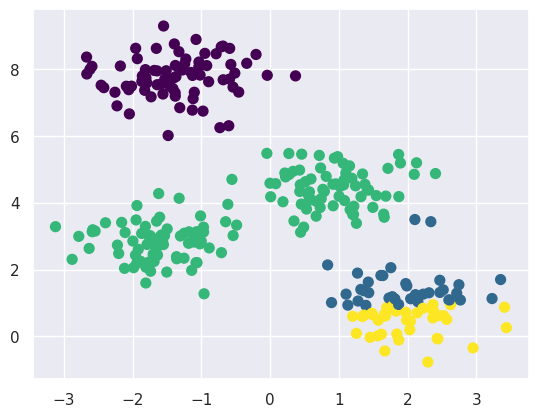

In [16]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

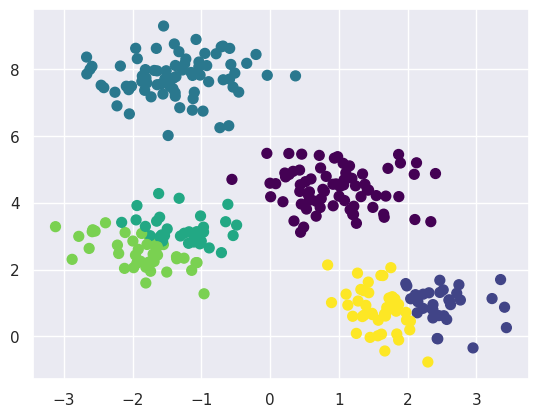

In [17]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

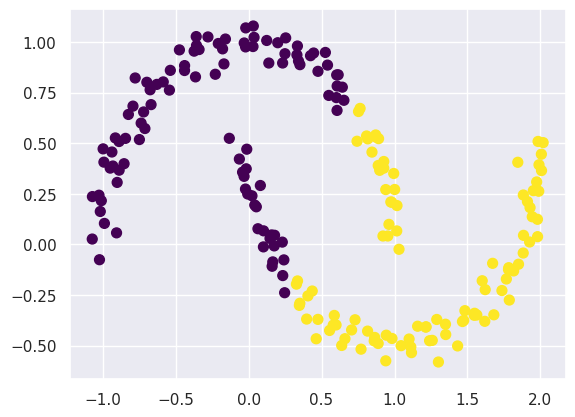

In [19]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


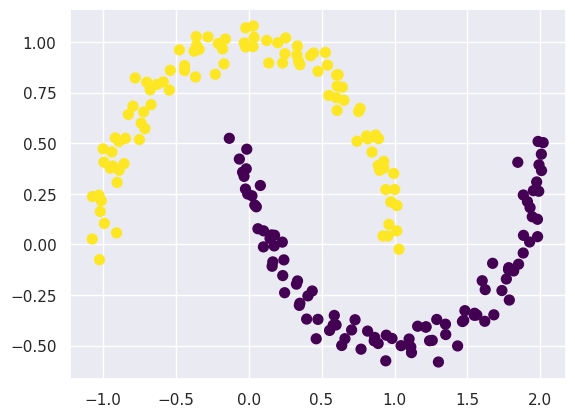

In [20]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [22]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

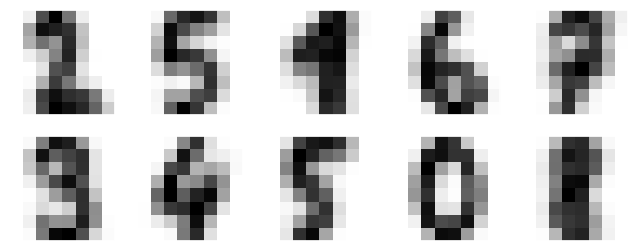

In [23]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [24]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

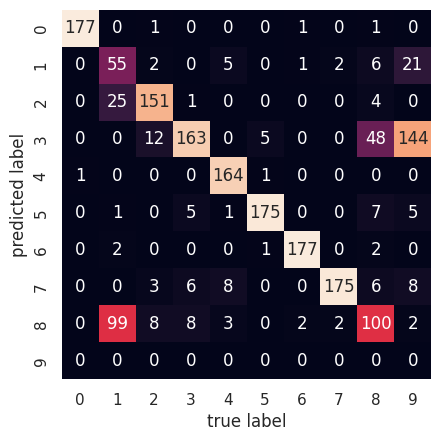

In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [27]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

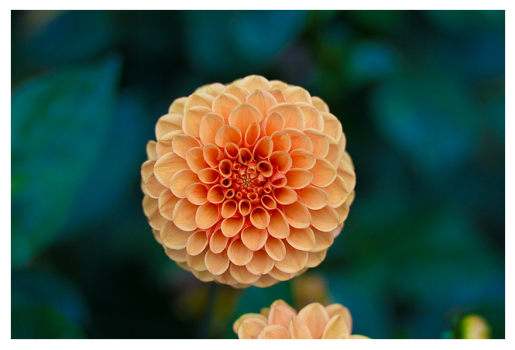

In [28]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [30]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [31]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

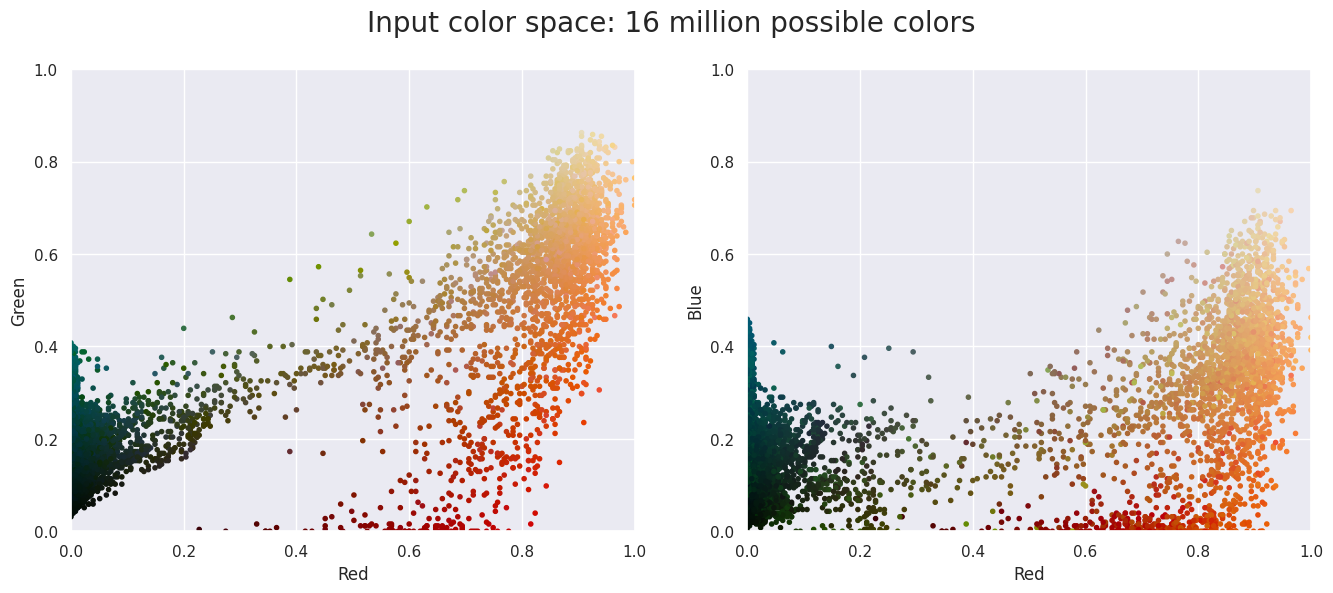

In [32]:
plot_pixels(data, title='Input color space: 16 million possible colors')

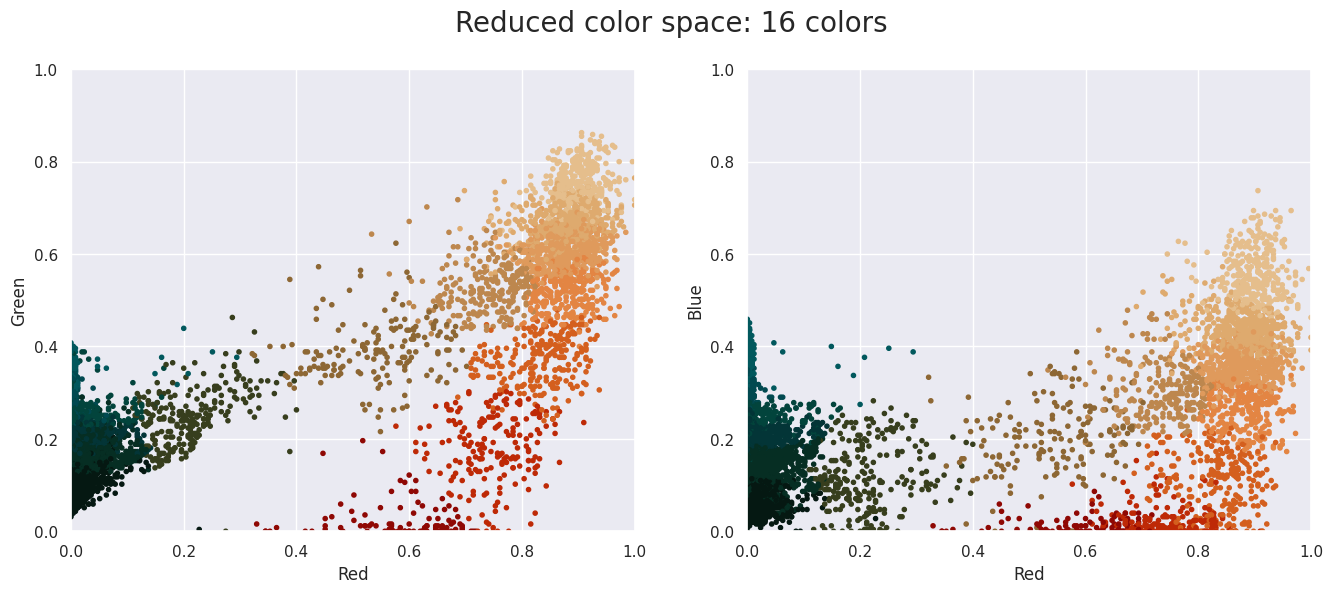

In [33]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

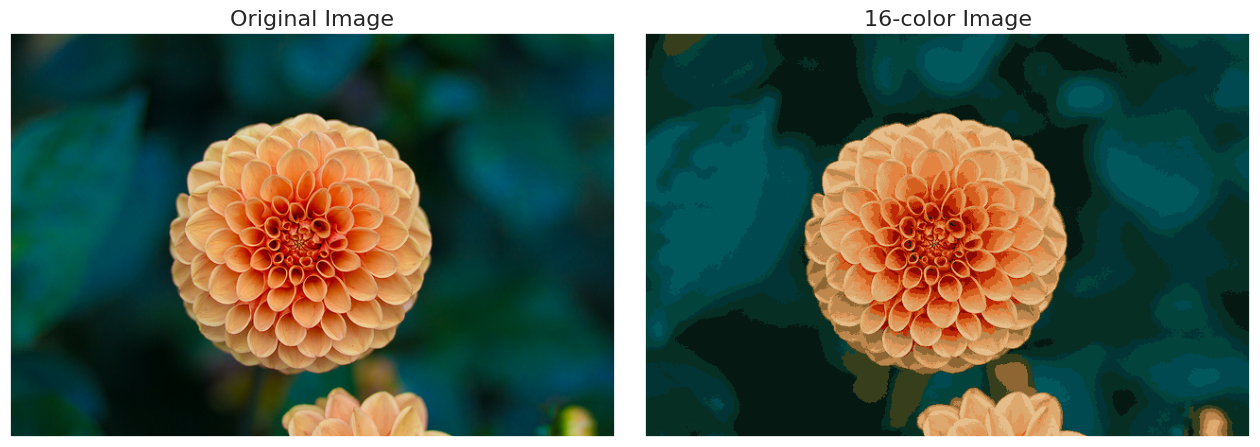

In [34]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Praktikum 3

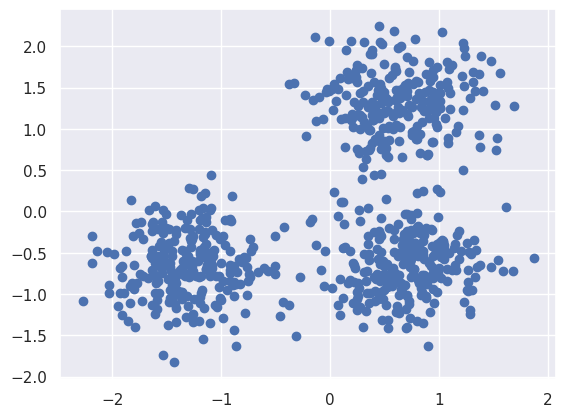

In [39]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [42]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [44]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


'Estimated number of clusters: 3'

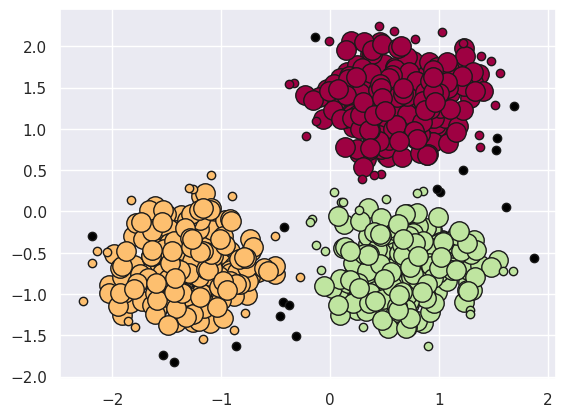

In [45]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

(f"Estimated number of clusters: {n_clusters_}")

#Tugas Praktikum
### 1. Tugas K-Means

Buatlah sebuah model K-Means dengan ketentuan,

Gunakan data 'Mall_Customers.csv'

Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

### 2. Tugas DBSCAN
Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

Lakukan eksperimen:

eps = 0.05, 0.1, 0.3, 0.5

min_samples = 3, 10, 20

Catat perubahan klaster, noise, dan kualitas evaluasi.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [105]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


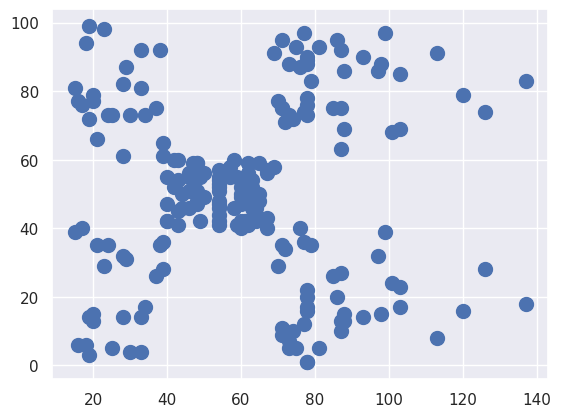

In [106]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

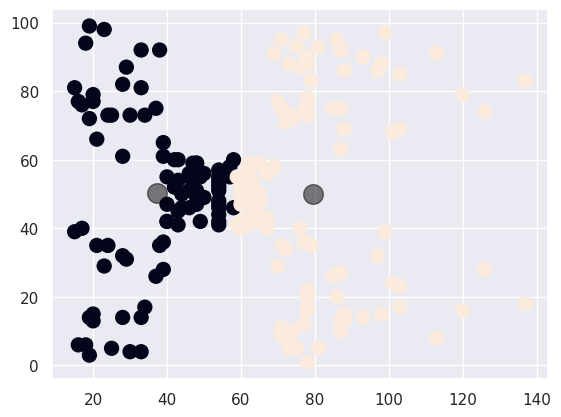

In [107]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [108]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 181363.59595959607


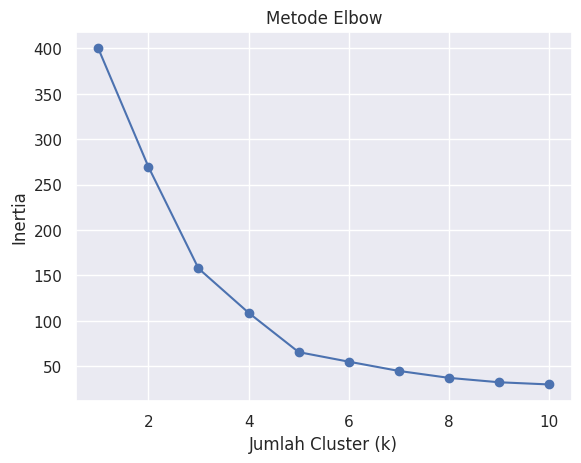

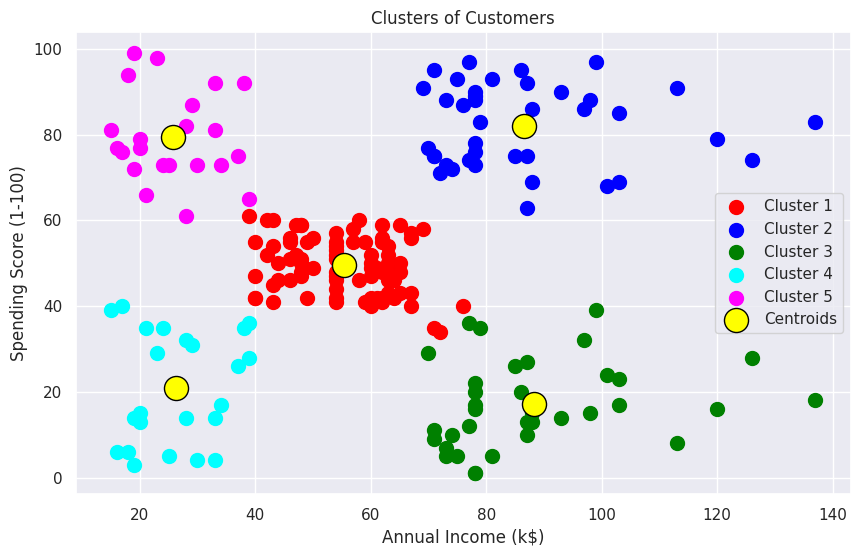

In [113]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i, color in enumerate(colors):
    plt.scatter(X.iloc[y_kmeans == i, 0], X.iloc[y_kmeans == i, 1],
                s=100, c=color, label=f'Cluster {i+1}')

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1],
            s=300, c='yellow', edgecolor='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


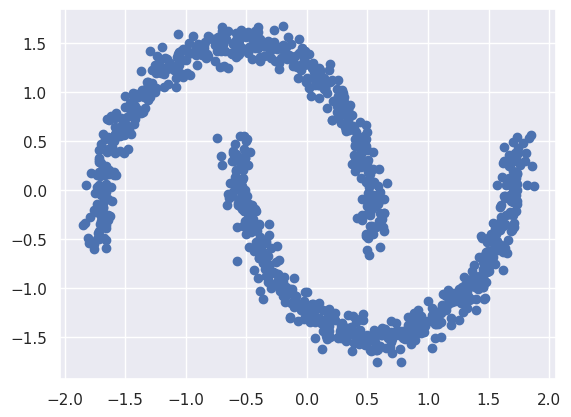

In [121]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [124]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster: 2
Jumlah noise: 0


In [126]:
from sklearn.metrics import (homogeneity_score, completeness_score, v_measure_score,
                             adjusted_rand_score, adjusted_mutual_info_score, silhouette_score)

# Ambil label hasil DBSCAN
labels = db.labels_

# Evaluasi (hanya jika cluster lebih dari 1)
if n_clusters > 1:
    hom = homogeneity_score(y_true, labels)
    com = completeness_score(y_true, labels)
    vme = v_measure_score(y_true, labels)
    ari = adjusted_rand_score(y_true, labels)
    ami = adjusted_mutual_info_score(y_true, labels)
    sil = silhouette_score(X, labels)

    print(f"Homogeneity : {hom:.3f}")
    print(f"Completeness: {com:.3f}")
    print(f"V-measure   : {vme:.3f}")
    print(f"ARI         : {ari:.3f}")
    print(f"AMI         : {ami:.3f}")
    print(f"Silhouette  : {sil:.3f}")
else:
    print("Cluster kurang dari 2, evaluasi tidak bisa dihitung.")

Homogeneity : 1.000
Completeness: 1.000
V-measure   : 1.000
ARI         : 1.000
AMI         : 1.000
Silhouette  : 0.391


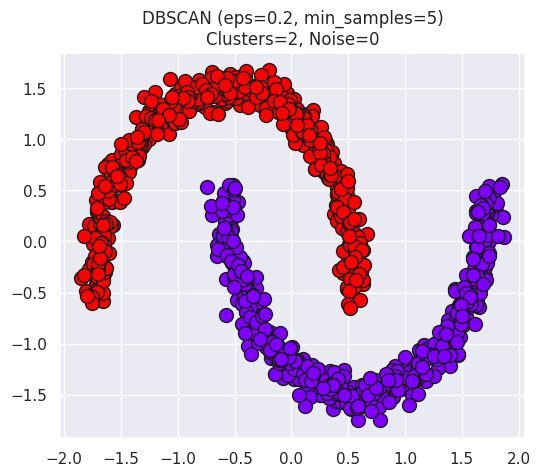

In [129]:
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(6, 5))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = "k"

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=4)

plt.title(f"DBSCAN (eps=0.2, min_samples=5)\nClusters={n_clusters}, Noise={n_noise}")
plt.show()


eps=0.05, min_samples=3 → Clusters=69, Noise=186
 Homogeneity : 0.8155542882355717
 Completeness: 0.15254831024758073
 V-measure   : 0.25702116445185835
 ARI         : 0.03004350976613907
 AMI         : 0.243804587789628
 Silhouette  : 0.11292949852882253



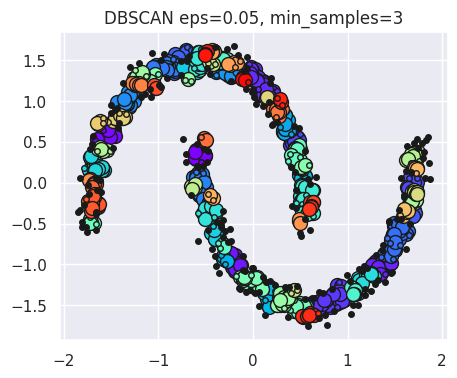

eps=0.05, min_samples=10 → Clusters=3, Noise=970
 Homogeneity : 0.030669398254336424
 Completeness: 0.126764095870306
 V-measure   : 0.04938947156339281
 ARI         : 0.0022825509789741014
 AMI         : 0.0458636142209481
 Silhouette  : -0.29419008256642176



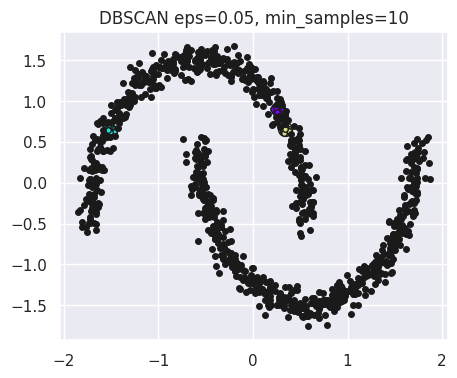

eps=0.05, min_samples=20 → Clusters=0, Noise=1000
Skipping metrics evaluation because 1 or fewer clusters were found.



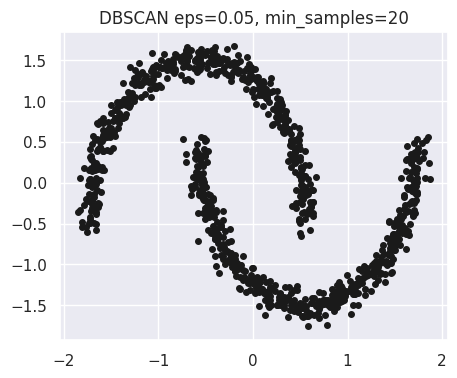

eps=0.1, min_samples=3 → Clusters=2, Noise=14
 Homogeneity : 0.9862068060955204
 Completeness: 0.9028959083596275
 V-measure   : 0.9427143195619004
 ARI         : 0.9721793882692121
 AMI         : 0.942633562340455
 Silhouette  : 0.2516903011504368



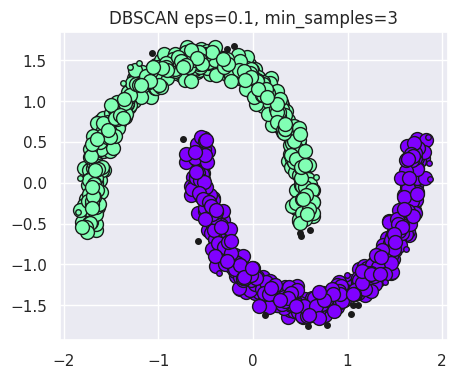

eps=0.1, min_samples=10 → Clusters=7, Noise=57
 Homogeneity : 0.9433167874862703
 Completeness: 0.4095463775841256
 V-measure   : 0.571132370522031
 ARI         : 0.5233989566001742
 AMI         : 0.5698012090719349
 Silhouette  : 0.16230611373347142



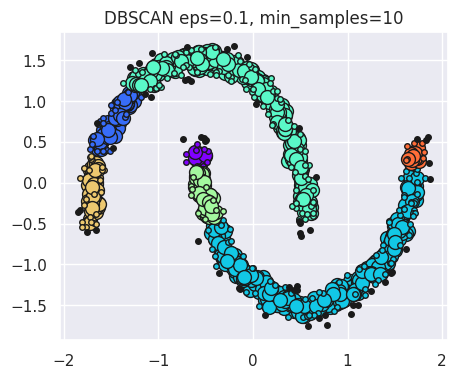

eps=0.1, min_samples=20 → Clusters=6, Noise=850
 Homogeneity : 0.1539283270028087
 Completeness: 0.15546586661916142
 V-measure   : 0.15469327639657426
 ARI         : 0.016753669189074054
 AMI         : 0.1509160954115189
 Silhouette  : -0.3601946191938665



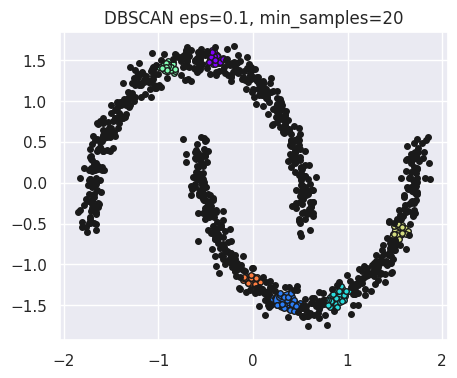

eps=0.3, min_samples=3 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



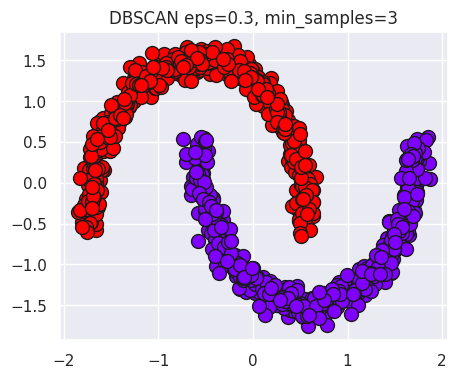

eps=0.3, min_samples=10 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



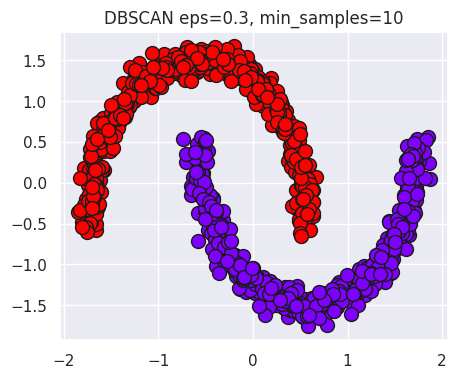

eps=0.3, min_samples=20 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



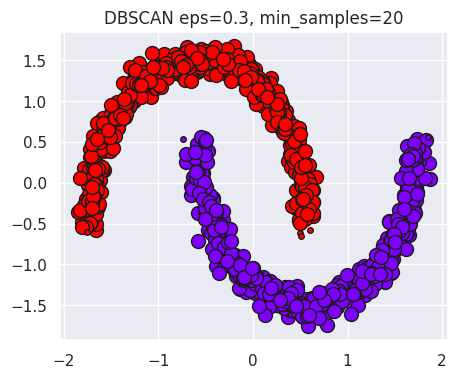

eps=0.5, min_samples=3 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



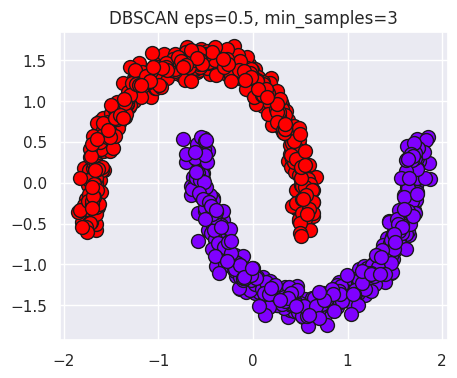

eps=0.5, min_samples=10 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



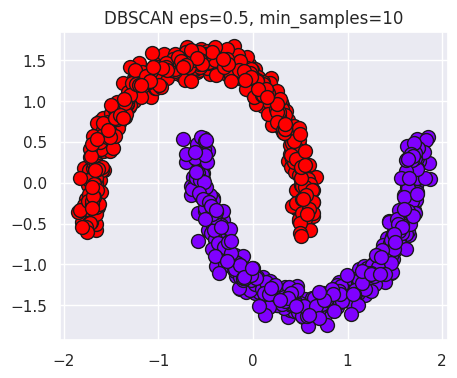

eps=0.5, min_samples=20 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



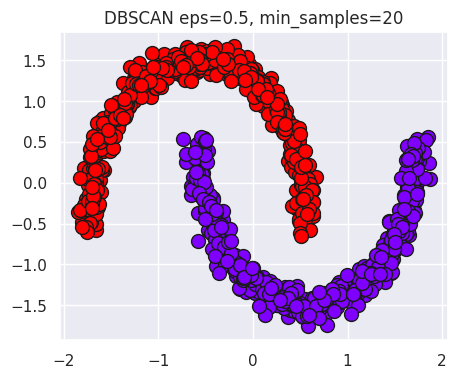

In [132]:
eps_exp = [0.05, 0.1, 0.3, 0.5]
min_samples_exp = [3, 10, 20]

for eps in eps_exp:
    for min_samples in min_samples_exp:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps}, min_samples={min_samples} → Clusters={n_clusters}, Noise={n_noise}")

        if n_clusters > 1:
            print(" Homogeneity :", homogeneity_score(y_true, labels))
            print(" Completeness:", completeness_score(y_true, labels))
            print(" V-measure   :", v_measure_score(y_true, labels))
            print(" ARI         :", adjusted_rand_score(y_true, labels))
            print(" AMI         :", adjusted_mutual_info_score(y_true, labels))
            print(" Silhouette  :", silhouette_score(X, labels))
        else:
            print("Skipping metrics evaluation because 1 or fewer clusters were found.")
        print()

        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        unique_labels = set(labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

        plt.figure(figsize=(5, 4))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = "k"

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=10)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=4)

        plt.title(f"DBSCAN eps={eps}, min_samples={min_samples}")
        plt.show()